# Game of Life !

Yet another implementation of the game of life

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
from matplotlib import animation, rc, cm
rc('animation', html='html5')

## A class to rule them all...

In [2]:
class LLCA:
    """
    A Life Like Cellular Automaton (LLCA) (https://en.wikipedia.org/wiki/Life-like_cellular_automaton)
    
    Inputs:
    * C: a binary matrix representing the cells where 1 stands for alive and 0 for dead.
    * B: Birth rule (example: [2] for Game of Life)
    * S: Survival rule (example: [2, 3] for Game of Life)
    """
    def __init__(self, C, B, S):
        self.C = np.array(C).astype(np.int64)
        self.B = np.array(B).astype(np.int64)
        self.S = np.array(S).astype(np.int64)
        
    def neighbors(self):
        """
        Returns the number of neigbors of each cell.
        """
        C = self.C
        N = np.zeros_like(C) # Neighbors matrix
        N[:-1, :  ]  += C[1:  , :  ] # Living cells south
        N[:  , :-1]  += C[ :  ,1:  ] # Living cells east
        N[1: , :  ]  += C[ :-1, :  ] # Living cells north
        N[:  ,1:  ]  += C[ :  , :-1] # Living cells west
        N[:-1, :-1]  += C[1:  ,1:  ] # Living cells south east
        N[1: , :-1]  += C[ :-1,1:  ] # Living cells north east
        N[1: , 1: ]  += C[ :-1, :-1] # Living cells north west
        N[:-1, 1: ]  += C[1:  , :-1] # Living cells south west
        return N
    
    def iterate(self):
        """
        Iterates one time.
        """
        B, S = self.B, self.S
        C0 = self.C
        N = self.neighbors()
        C = np.where(N == 2, C0, 0) # If a cell has 2 neighbors, it keeps its current state.
        C += np.where(N == 3, 1, 0 ) # If a cell has 3 neighbors, it gets alive !
        self.C = C 
        
        
        

## A starting point

In [11]:
X0 = (np.random.rand(100, 100) >.5) * 1
X0

array([[1, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ..., 
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 0]])

<IPython.core.display.Javascript object>


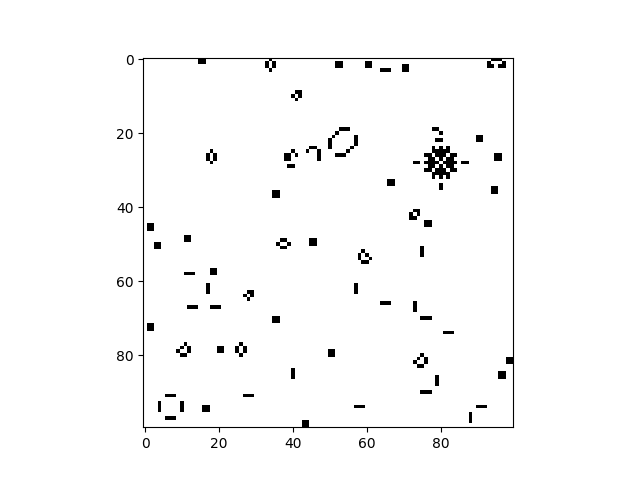

In [12]:
def updatefig(*args):
    g.iterate()
    im.set_array(g.X)
    return im,

g = GoL(X0)
fig = plt.figure()
im = plt.imshow(g.X, interpolation = "nearest", cmap = cm.binary, animated=True)
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=100, blit=True)

plt.show()



<IPython.core.display.Javascript object>


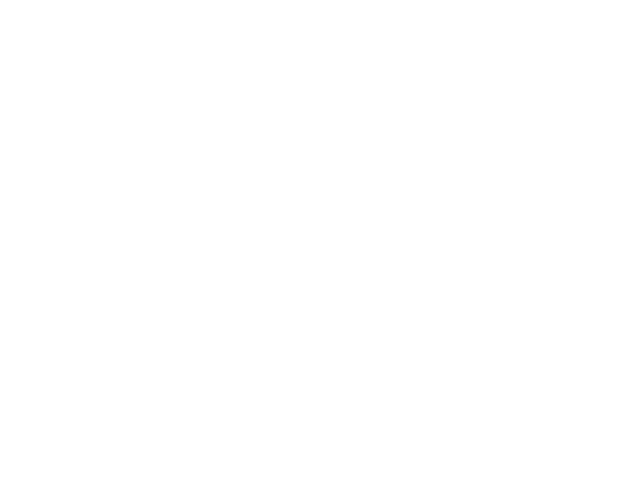

In [5]:
def updatefig(*args):
    g.iterate()
    im.set_array(g.X)
    return im,

g = GoL(X0)
fig = plt.figure()
im = plt.imshow(g.X, interpolation = "nearest", cmap = cm.binary, animated=True)
#plt.show()
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50, blit=True)
plt.close()
anim

In [18]:
rule = "B3S23"
r = rule.upper().split("S")
r = [r[0][1:], r[1]]
r

['3', '23']